In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

heart = pd.read_csv('hehe.csv')
lung = pd.read_csv('survey lung cancer dup.csv')

In [49]:
columns_to_convert = [
    'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker',
    'Stroke', 'Diabetes', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost',
    'DiffWalk', 'Sex', 'Education'
]

# Convert specified columns to integers
heart[columns_to_convert] = heart[columns_to_convert].fillna(0).astype(int)
heart['BMI'] = heart['BMI'].round().astype(int)
heart['PhysActivity'] = heart['PhysActivity'].round().astype(int)
heart['Fruits'] = heart['Fruits'].round().astype(int)
heart['Veggies'] = heart['Veggies'].round().astype(int)
heart['Income'] = heart['Income'].round().astype(int)
heart['MentHlth'] = heart['MentHlth'].round().astype(int)
heart['GenHlth'] = heart['GenHlth'].round().astype(int)
heart['Sex'] = heart['Sex'].round().astype(int)
heart['PhysHlth'] = heart['PhysHlth'].round().astype(int)
heart['Age'] = heart['Age'].round().astype(int)

In [50]:
heart.info()
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   Diabetes              253680 non-null  int64
 8   PhysActivity          253680 non-null  int64
 9   Fruits                253680 non-null  int64
 10  Veggies               253680 non-null  int64
 11  HvyAlcoholConsump     253680 non-null  int64
 12  AnyHealthcare         253680 non-null  int64
 13  NoDocbcCost           253680 non-null  int64
 14  GenHlth               253680 non-null  int64
 15  MentHlth              253680 non-n

In [51]:
# CLEANING for LUNG
print(lung.isna().sum().sum())
print(lung.duplicated().sum())
lung = lung.drop_duplicates(keep = False)
print(lung.duplicated().sum())

0
33
0


In [52]:
print(heart.isna().sum().sum())
heart = heart.drop_duplicates(keep = False)
print(heart.duplicated().sum())

0
0


In [53]:
columns_to_encode_lung = ['GENDER','LUNG_CANCER']

label_encoder = LabelEncoder()
for column in columns_to_encode_lung:
    lung[column] = label_encoder.fit_transform(lung[column])

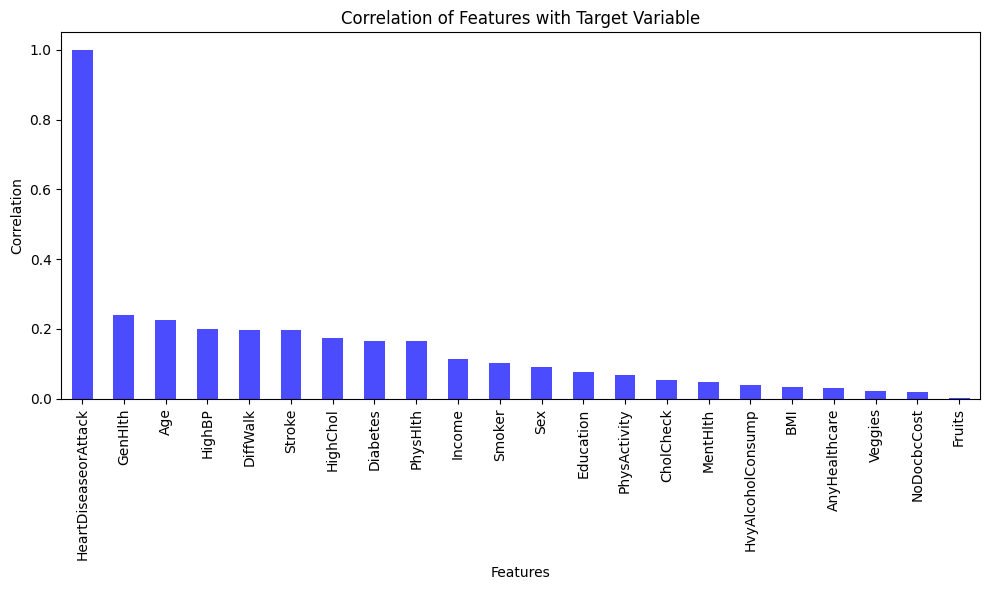

In [54]:
target_variable = 'HeartDiseaseorAttack'


correlations = heart.corr()
correlation_with_target = correlations[target_variable]


correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='b', alpha=0.7)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

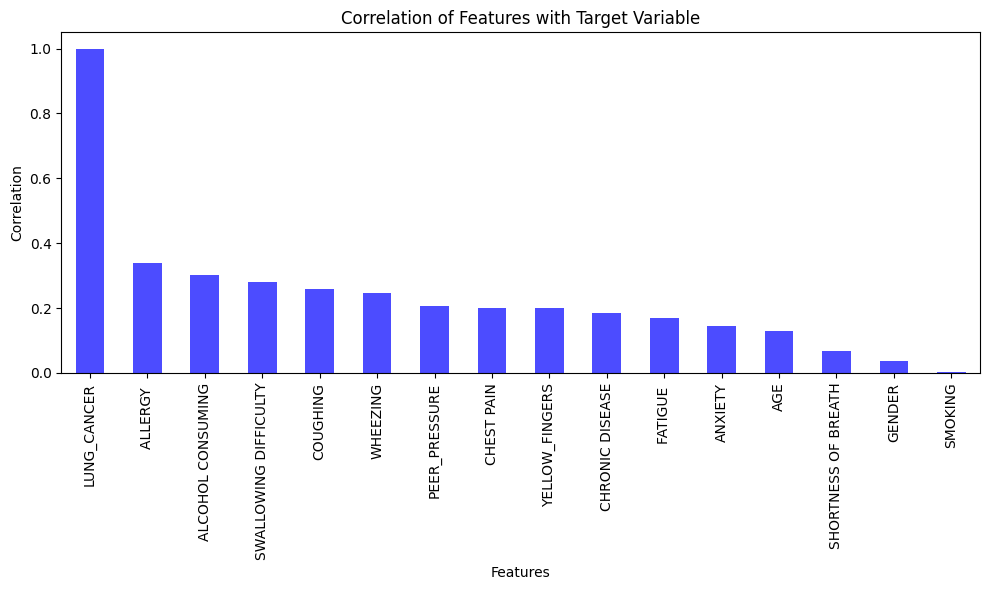

(243, 16)
0


In [55]:
target_variable = 'LUNG_CANCER'


correlations = lung.corr()
correlation_with_target = correlations[target_variable]


correlation_with_target = correlation_with_target.abs().sort_values(ascending=False)


plt.figure(figsize=(10, 6))
correlation_with_target.plot(kind='bar', color='b', alpha=0.7)
plt.title('Correlation of Features with Target Variable')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
print(lung.shape)
print(lung.duplicated().sum())

In [56]:
lung.drop(['PEER_PRESSURE','CHRONIC DISEASE','CHEST PAIN','FATIGUE ','ANXIETY','CHRONIC DISEASE'], axis=1, inplace=True)
heart.drop(['Smoker','Education','Income','MentHlth','BMI','CholCheck','NoDocbcCost','HvyAlcoholConsump','Fruits', 'Veggies','AnyHealthcare',], axis=1, inplace=True)

In [57]:
print(lung.duplicated().sum())

4


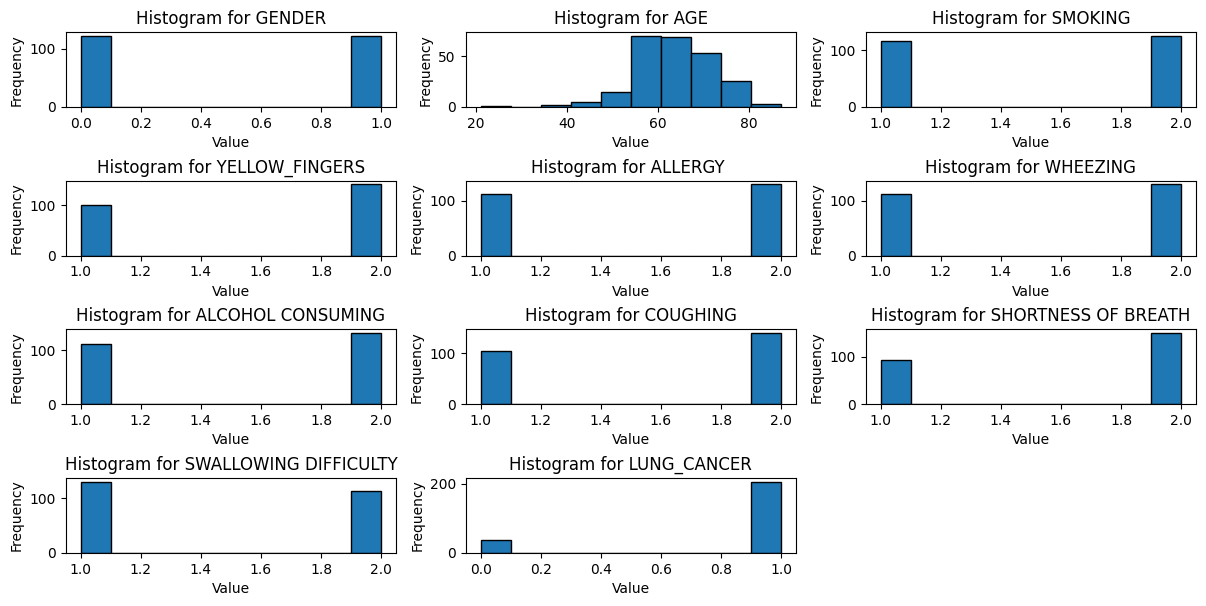

(243, 11)
4


In [58]:
# Data Analysis for Lung
n_rows = len(lung.columns) // 3 + 1
n_cols = 3

plt.figure(figsize=(12, 6))

for i, column in enumerate(lung.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(lung[column], bins=10, edgecolor='k')
    plt.title(f'Histogram for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout(pad = 0.5,h_pad=0.6,w_pad=1)
plt.show()
print(lung.shape)
print(lung.duplicated().sum())

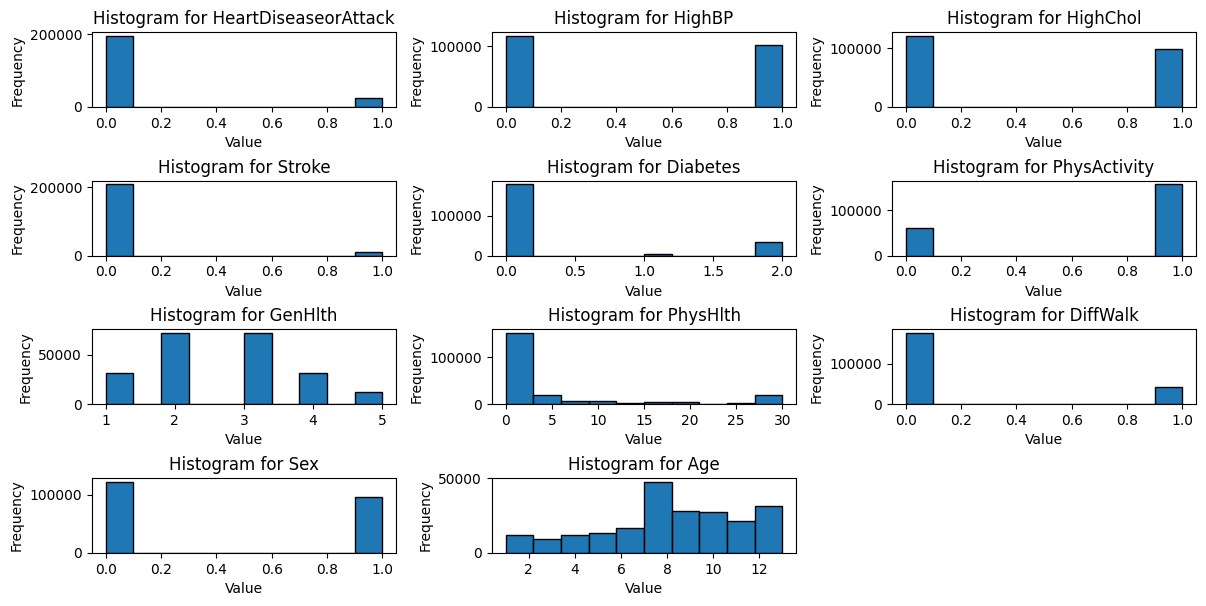

In [59]:
# Data Analysis for Heart
n_rows = len(heart.columns) // 3 + 1
n_cols = 3

plt.figure(figsize=(12, 6))

for i, column in enumerate(heart.columns):
    plt.subplot(n_rows, n_cols, i + 1)
    plt.hist(heart[column], bins=10, edgecolor='k')
    plt.title(f'Histogram for {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout(pad = 0.5,h_pad=0.6,w_pad=1)
plt.show()

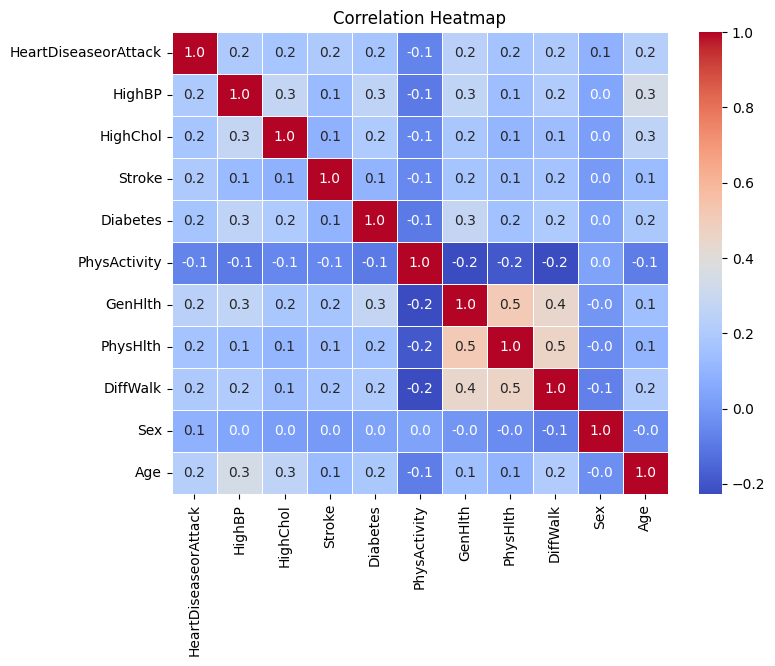

In [60]:
# CORELAITON HEART
correlation_matrix = heart.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

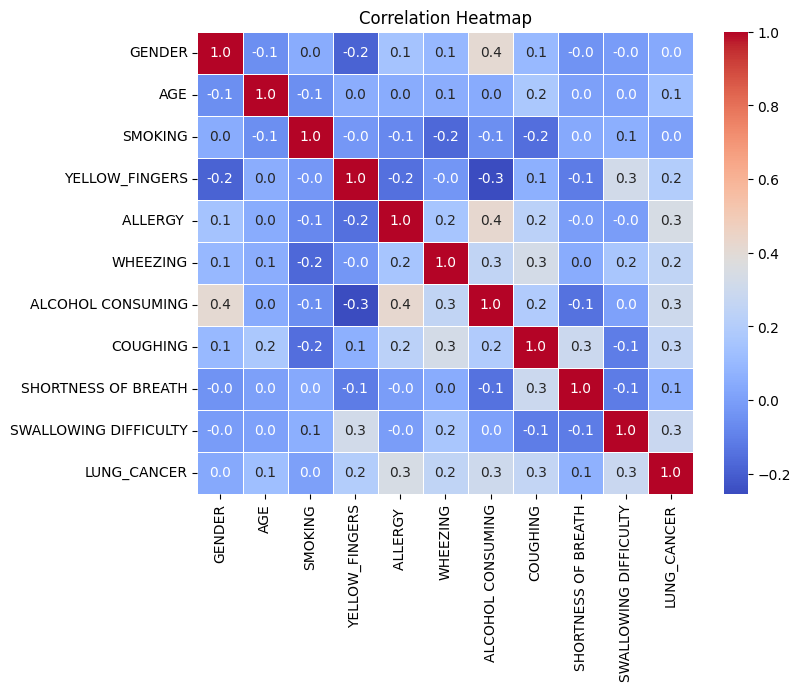

In [61]:
# CORELAITON LUNG
correlation_matrix = lung.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5,fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()


Orignal dataset shape Counter({1: 206, 0: 37})


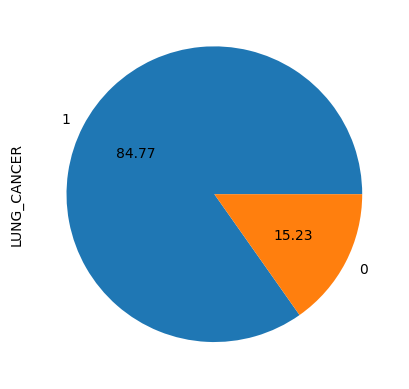

In [62]:
# CLEANING for LUNG
# print(lung.isna().sum().sum())
# print(lung.duplicated().sum())
# lung = lung.drop_duplicates(keep = False)
target_lung = lung.pop('LUNG_CANCER')
target_lung.value_counts().plot.pie(autopct='%.2f')
print('Orignal dataset shape {}'.format(Counter(target_lung)))


Orignal dataset shape Counter({1: 206, 0: 206})

Resampled dataset shape Counter({1: 206, 0: 206})


<Axes: ylabel='LUNG_CANCER'>

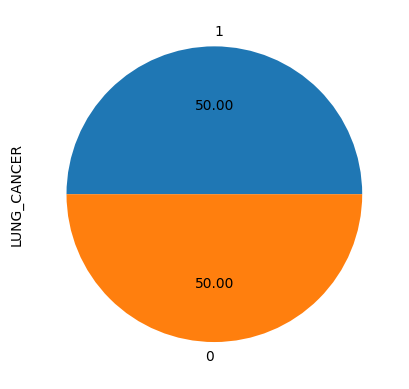

In [63]:
# BALANCING for LUNG
ros_lung = RandomOverSampler(random_state=0)
lung , target_lung = ros_lung.fit_resample(lung,target_lung)
print('\nOrignal dataset shape {}'.format(Counter(target_lung)))
print('\nResampled dataset shape {}'.format(Counter(target_lung)))
target_lung.value_counts().plot.pie(autopct='%.2f')

Orignal dataset shape Counter({0: 195031, 1: 23563})


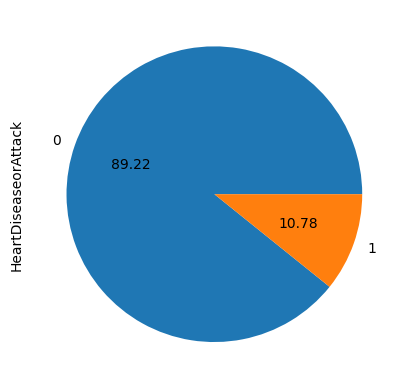

In [64]:
# CLEANING for HEART
# heart.isna().sum().sum()
# heart = heart.drop_duplicates(keep = False)
target_heart = heart.pop('HeartDiseaseorAttack')
target_heart.value_counts().plot.pie(autopct='%.2f')
print('Orignal dataset shape {}'.format(Counter(target_heart)))


Orignal dataset shape Counter({0: 195031, 1: 195031})

Resampled dataset shape Counter({0: 195031, 1: 195031})


<Axes: ylabel='HeartDiseaseorAttack'>

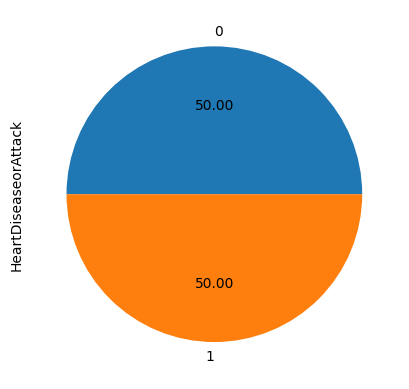

In [65]:
# BALANCING for HEART
ros_heart = RandomOverSampler(random_state=0)
heart , target_heart = ros_heart.fit_resample(heart,target_heart)
print('\nOrignal dataset shape {}'.format(Counter(target_heart)))
print('\nResampled dataset shape {}'.format(Counter(target_heart)))
target_heart.value_counts().plot.pie(autopct='%.2f')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xtrain,xtest,ytrain,ytest = train_test_split(lung,target_lung,train_size = 0.8,shuffle = True,random_state=42)


In [67]:
model = DecisionTreeClassifier()
model.fit(xtrain, ytrain)
training_accuracy = model.score(xtrain, ytrain)

print(training_accuracy)

In [68]:
pred = model.predict(xtest)
test_acc = accuracy_score(pred,ytest)
print(test_acc)

In [69]:
from sklearn.metrics import confusion_matrix


# Create a confusion matrix
cm = confusion_matrix(ytest,pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)



In [70]:
# from sklearn.ensemble import GradientBoostingClassifier


# model = GradientBoostingClassifier(max_depth = 5,learning_rate = 0.17)
# model.fit(xtrain, ytrain)
# training_accuracy = model.score(xtrain, ytrain)


# print(training_accuracy)



0.761402856602649


In [71]:
# from sklearn.metrics import accuracy_score
# pred = model.predict(xtest)
# test_acc = accuracy_score(pred,ytest)
# print(test_acc)

0.7588863394562445


In [72]:
# from sklearn.metrics import confusion_matrix


# # Create a confusion matrix
# cm = confusion_matrix(ytest,pred)

# # Print the confusion matrix
# print("Confusion Matrix:")
# print(cm)



Confusion Matrix:
[[27629 11450]
 [ 7360 31574]]
